In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =[10,6]

In [2]:
df=pd.read_csv('customer_data.csv')

In [3]:
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
df.shape

(1125, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [6]:
df.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [7]:
#checking missing value in each column
df.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [8]:
#treating missing value
df['fea_2']=df['fea_2'].fillna(df['fea_2'].mean())

In [9]:
df.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [10]:
#dropping irrelevant feature
df1=df.drop('id',axis=1)

In [11]:
df1

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


# data visualization

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_1', ylabel='Density'>

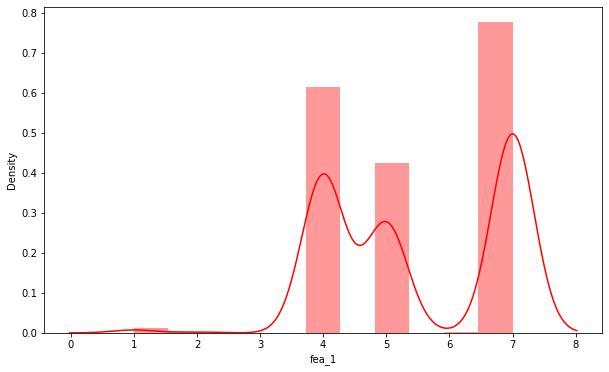

In [12]:
sns.distplot(df['fea_1'],color='red')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_2', ylabel='Density'>

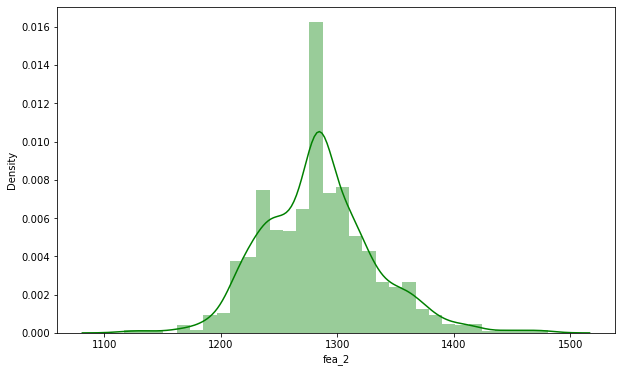

In [13]:
sns.distplot(df['fea_2'],color='green')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_3', ylabel='Density'>

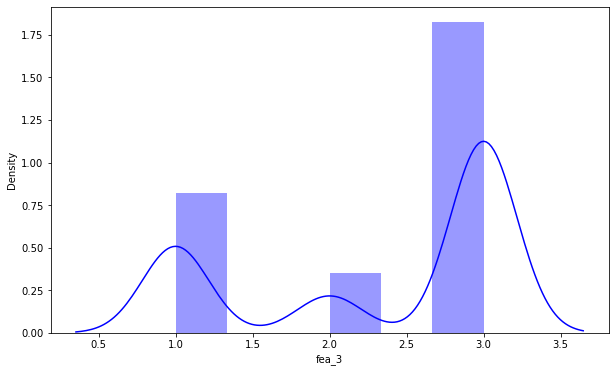

In [14]:
sns.distplot(df['fea_3'],color='blue')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_4', ylabel='Density'>

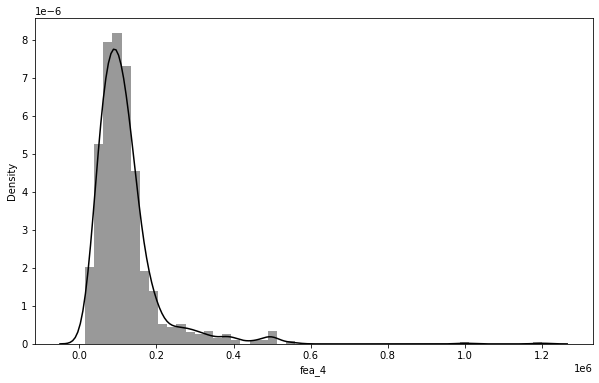

In [15]:
sns.distplot(df['fea_4'],color='black')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_5', ylabel='Density'>

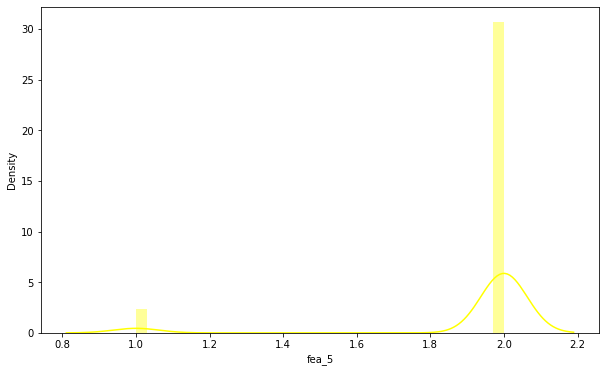

In [16]:
sns.distplot(df['fea_5'],color='yellow')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_6', ylabel='Density'>

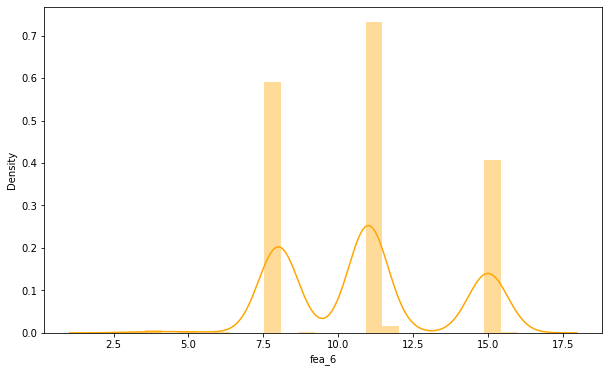

In [17]:
sns.distplot(df['fea_6'],color='orange')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_7', ylabel='Density'>

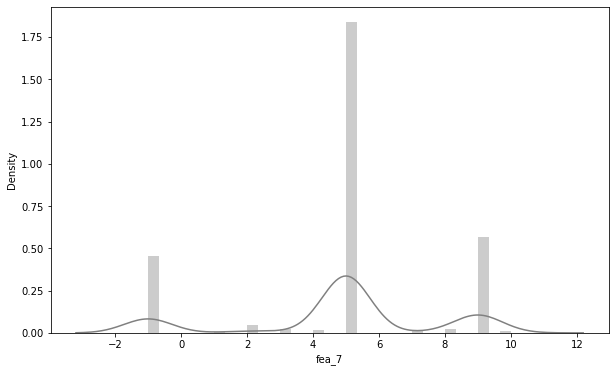

In [18]:
sns.distplot(df['fea_7'],color='grey')

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_8', ylabel='Density'>

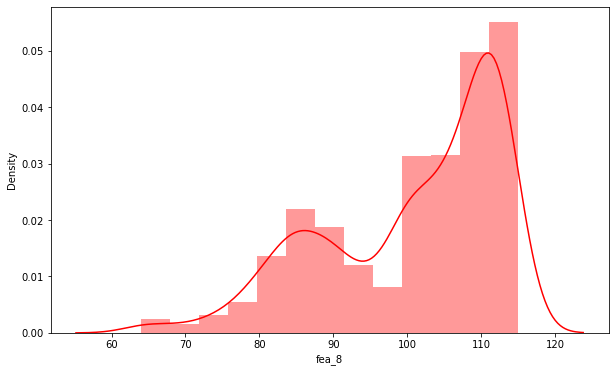

In [19]:
sns.distplot(df['fea_8'],color='red')

<AxesSubplot:>

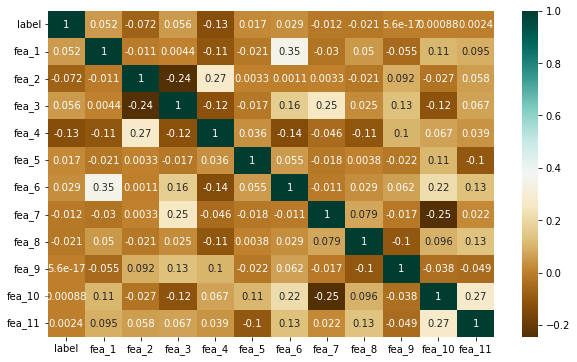

In [20]:
#checking coorelation
sns.heatmap(df1.corr(),annot=True,cmap = plt.cm.BrBG)

<AxesSubplot:>

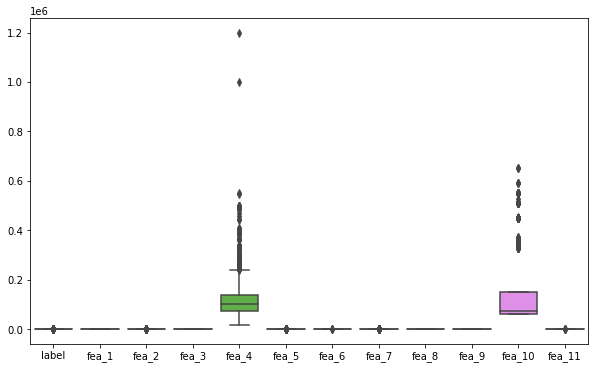

In [21]:
sns.boxplot(data=df1,orient='v')

In [22]:
#Findings : fea_4 & fea_10 conatins outliers

# Treating outliers


# finding iqr of fea_4

In [23]:
q1=df['fea_4'].quantile(0.25)
q3=df['fea_4'].quantile(0.75)

In [24]:
q1

72000.0

In [25]:
q3

139000.0

In [26]:
iqr=q3-q1

In [27]:
iqr

67000.0

In [28]:
#calculating lower & upper bound
lb=q1-(1.5*67000.0)

In [29]:
lb

-28500.0

In [30]:
up=q3+(1.5*67000.0)

In [31]:
up

239500.0

In [32]:
new_df =df[(df['fea_4']>=lb) & (df['fea_4']<=up)]

In [33]:
new_df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [34]:
df[~((df['fea_4']>=lb) & (df['fea_4']<=up))]

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
10,0,58996401,7,1314.500000,1,483000.0,2,11,9,101,3,151300,282.842713
39,0,54988158,7,1347.500000,1,392000.0,2,11,4,114,4,60018,1.000000
56,0,54982353,1,1130.000000,2,1000000.0,2,4,-1,100,5,650018,1.000000
63,0,58998646,4,1293.500000,1,458000.0,2,8,-1,75,5,340017,200.000000
81,0,58998566,4,1281.500000,3,304000.0,2,8,5,84,3,60024,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0,54982356,1,1391.000000,1,1200000.0,2,5,-1,64,5,361026,1.000000
1094,0,59004680,4,1370.000000,1,273000.0,2,8,9,110,5,60015,1.000000
1101,1,54985832,7,1308.500000,3,500000.0,2,11,9,85,5,60001,387.298335
1107,0,58985785,5,1283.911373,3,250000.0,2,15,-1,111,5,450031,187.082869


In [35]:
#treating outlier (by capping)

In [36]:
df1['fea_4']=np.where(df1['fea_4']>= up,
                   up,
                   np.where(df1['fea_4']<=lb,
                            lb,
                            df1['fea_4']))



In [37]:
df1.shape

(1125, 12)

# finding iqr of fea_10

In [38]:
q1=df['fea_10'].quantile(0.25)
q3=df['fea_10'].quantile(0.75)

In [39]:
q1

60044.0

In [40]:
q3

151307.0

In [41]:
iqr=q3-q1

In [42]:
iqr

91263.0

In [43]:
#calculating lower & upper bound
lb=q1-(1.5*91263.0)

In [44]:
lb

-76850.5

In [45]:
up=q3+(1.5*91263.0)

In [46]:
up

288201.5

In [47]:
new_df =df[(df['fea_10']>=lb) & (df['fea_10']<=up)]

In [48]:
new_df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
5,0,59005995,6,1217.000000,3,56000.0,2,6,-1,100,3,60091,1.000000
6,1,59001917,4,1304.000000,3,35000.0,2,8,9,85,5,60069,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0,54989264,4,1343.000000,3,110000.0,2,8,2,105,5,60043,1.000000
1117,0,59001031,4,1283.911373,2,58000.0,2,8,5,100,5,151300,196.214169
1122,0,58995381,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [49]:
df[~((df['fea_10']>=lb) & (df['fea_10']<=up))]

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
18,1,54985924,7,1241.000000,1,111000.0,2,11,5,90,5,350068,223.606798
20,0,58994740,7,1283.911373,2,77000.0,2,11,9,114,5,510000,159.699718
23,0,54991685,4,1304.000000,1,35000.0,2,8,5,105,3,340019,181.659021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0,58985542,5,1272.500000,3,108000.0,2,15,5,113,4,450015,200.000000
1118,0,58992063,7,1137.500000,3,88000.0,2,11,-1,107,4,450081,158.113883
1119,0,54985816,7,1320.500000,3,108000.0,2,11,5,110,4,510068,248.997992
1120,0,58988196,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000


In [50]:
#treating outlier (by capping)
df1['fea_10']=np.where(df1['fea_10']>= up,
                   up,
                   np.where(df1['fea_10']<=lb,
                            lb,
                            df1['fea_10']))

In [51]:
df.shape

(1125, 13)

<AxesSubplot:>

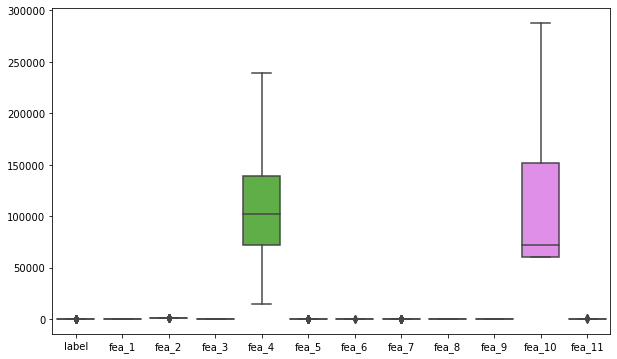

In [52]:
sns.boxplot(data=df1,orient='v')

#Outlier has been removed

In [53]:
X=df1.drop('label',axis=1)

In [54]:
y=df1['label']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

# Model building (standardization)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
X_train=scaler.fit_transform(X_train)

In [60]:
X_test=scaler.transform(X_test)

# LOGISTIC REGRESSION

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

In [62]:
ros = RandomOverSampler(sampling_strategy=0.70,random_state=1)

In [63]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [64]:
lr= LogisticRegression()

In [65]:
parameters={'C':[0.1,1.0,2,3,5,10,20,30,50],'penalty':['l1','l2'],'max_iter':[50,100,150,200]}

In [66]:
cv=GridSearchCV(lr,parameters,scoring='accuracy',cv=5)

In [67]:
cv.fit(X_resampled, y_resampled)

C:\Users\Hardik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hardik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hardik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Hardik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueErro

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 2, 3, 5, 10, 20, 30, 50],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [68]:
print(cv.best_params_)

{'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}


In [69]:
 y_pred=cv.predict(X_test)

In [70]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [71]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,recall_score,classification_report

In [72]:
accuracy_score(y_test,y_pred)

0.7603550295857988

In [73]:
confusion_matrix(y_test,y_pred)

array([[236,  36],
       [ 45,  21]], dtype=int64)

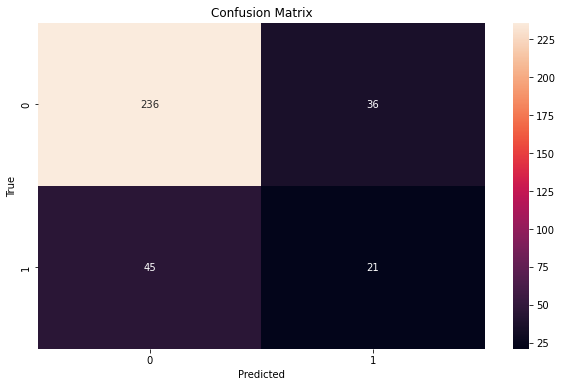

In [74]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')
plt.show()

In [75]:
precision_score(y_test,y_pred)

0.3684210526315789

In [76]:
recall_score(y_test,y_pred)

0.3181818181818182

In [77]:
f1_score(y_test,y_pred)

0.3414634146341463

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       272
           1       0.37      0.32      0.34        66

    accuracy                           0.76       338
   macro avg       0.60      0.59      0.60       338
weighted avg       0.75      0.76      0.75       338



# decision tree

In [79]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier

In [80]:
obj = RandomOverSampler(sampling_strategy=0.70, random_state=22)

In [81]:
X_resampled, y_resampled = obj.fit_resample(X_train, y_train)

In [82]:
model=DecisionTreeClassifier()

In [83]:
parameters={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,10,20]}

In [84]:
CV=GridSearchCV(model,parameters,scoring='accuracy',cv=5)

In [85]:
CV.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [86]:
print(CV.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}


In [87]:
y_pred=CV.predict(X_test)

In [88]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [89]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,recall_score,classification_report

In [90]:
accuracy_score(y_test,y_pred)

0.6893491124260355

In [91]:
confusion_matrix(y_test,y_pred)

array([[220,  52],
       [ 53,  13]], dtype=int64)

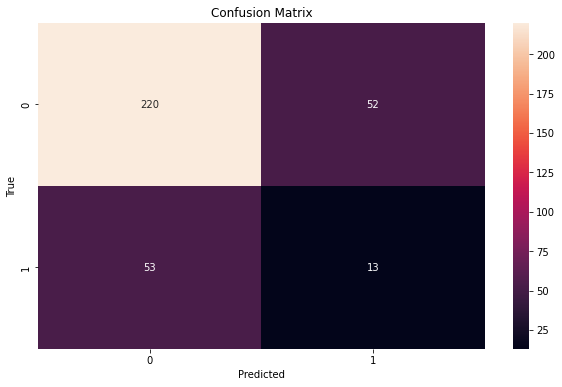

In [92]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')
plt.show()

In [93]:
precision_score(y_test,y_pred)

0.2

In [94]:
recall_score(y_test,y_pred)

0.19696969696969696

In [95]:
f1_score(y_test,y_pred)

0.19847328244274812

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       272
           1       0.20      0.20      0.20        66

    accuracy                           0.69       338
   macro avg       0.50      0.50      0.50       338
weighted avg       0.69      0.69      0.69       338



# Random forest

In [97]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [98]:
os = RandomOverSampler(sampling_strategy=0.70, random_state=42)

In [99]:
X_resampled, y_resampled = os.fit_resample(X_train, y_train)

In [100]:
rfc=RandomForestClassifier()

In [101]:
parameters={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,10,20]}

In [102]:
RCV=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)

In [103]:
RCV.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 10, 20]},
             scoring='accuracy')

In [104]:
print(RCV.best_params_)

{'criterion': 'gini', 'max_depth': 20}


In [105]:
y_pred=RCV.predict(X_test)

In [106]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [107]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,recall_score,classification_report

In [108]:
accuracy_score(y_test,y_pred)

0.7218934911242604

In [109]:
confusion_matrix(y_test,y_pred)

array([[224,  48],
       [ 46,  20]], dtype=int64)

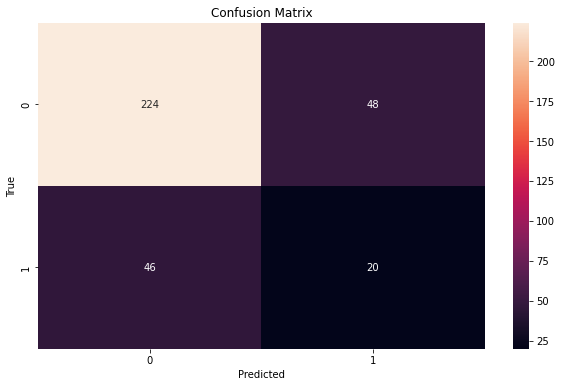

In [110]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')
plt.show()

In [111]:
recall_score(y_test,y_pred)

0.30303030303030304

In [112]:
f1_score(y_test,y_pred)

0.29850746268656714

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       272
           1       0.29      0.30      0.30        66

    accuracy                           0.72       338
   macro avg       0.56      0.56      0.56       338
weighted avg       0.73      0.72      0.72       338



#accuracy_score:
1)LOGISTIC REGRESSION= 0.7603550295857988
2)DECISION TREE= 0.6893491124260355
3)RANDOM FOREST= 0.7218934911242604